---
# Exercício Breast Cancer - Balanceamento, kNN, Regressão Logística
---

**Machine Learning em Projetos (Erick Muzart e Fernando melo)**  
Tópicos:

- Knn
- Regressão logística
- Matriz de confusão

## <br>


#### **Descrição do projeto de machine learning**

Antes de escrever qualquer código, precisamos entender o problema que queremos resolver e fazer uma descrição eficiente do projeto, visando a comunicação simples e rápida do objetivo do projeto para técnicos, gestores e colaboradores.

**1- Descrição do problema ou tarefa:**  
Prever se o câncer de mama é maligno ou benigno com base nas características da imagem digitalizada de um aspirado por agulha fina (FNA) de uma massa mamária.  
**2- Descrição da solução de IA:**  
Treinamento supervisionado de modelo de classificação de câncer de mama em 2 classes (benigno/maligno) com base nas características dos núcleos celulares presentes na imagem.  
**3- Fonte de dados:**  
Os dados foram obtidos a partir de uma imagem digitalizada de um aspirado por agulha fina (FNA) de uma massa mamária. Eles descrevem as características dos núcleos celulares presentes na imagem.  
Fonte dados: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html  
**4- Variáveis independentes (preditoras ou "features"):**  
'mean radius', 'mean texture', 'mean perimeter', 'mean area',
'mean smoothness', 'mean compactness', 'mean concavity',
'mean concave points', 'mean symmetry', 'mean fractal dimension',
'radius error', 'texture error', 'perimeter error', 'area error',
'smoothness error', 'compactness error', 'concavity error',
'concave points error', 'symmetry error',
'fractal dimension error', 'worst radius', 'worst texture',
'worst perimeter', 'worst area', 'worst smoothness',
'worst compactness', 'worst concavity', 'worst concave points',
'worst symmetry', 'worst fractal dimension'  
**5- Variável dependente (resposta ou "target"):**  
Tipo de câncer benigno ou maligno


## Carregar bibliotecas


In [58]:
# pip install seaborn

In [59]:
# Importar bibliotecas pandas, plot_confusion_matrix, train_test_split, matplotlib, seaborn, metrics
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

## Análise exploratória dos dados


In [60]:
# Importar  e instanciar dataset
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [61]:
# Converter sklearn dataset em pandas dataframe
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
# Cria nova coluna target
df["target"] = list(pd.Series(cancer.target).astype(int))
# Mostra as dimensões do dataset e as primeiras linhas
print("Dimensões do dataset: ", df.shape)
df.head()

Dimensões do dataset:  (569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [62]:
df.target.value_counts()

target
1    357
0    212
Name: count, dtype: int64

<Axes: title={'center': 'Total de amostras por tipo de cancer'}, xlabel='tipo cancer', ylabel='total de amostras'>

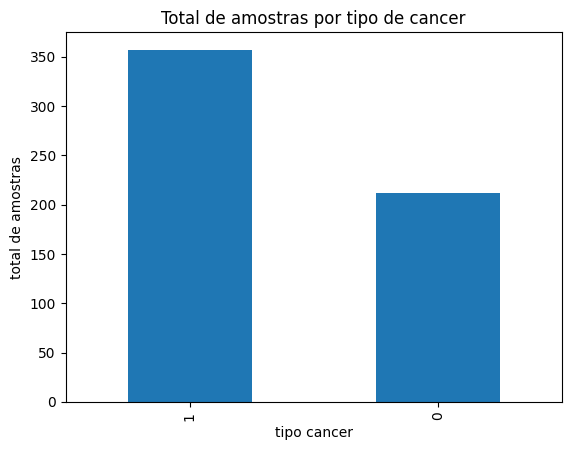

In [63]:
# Mostra gráfico a dirtibuição de amostras por rótulo da variável dependente("target")
df.target.value_counts().plot(
    xlabel="tipo cancer",
    ylabel="total de amostras",
    kind="bar",
    title="Total de amostras por tipo de cancer",
)

## Pré-processamento


In [64]:
# Atribuir valores para X e y
X = cancer.data
y = cancer.target
# Mostrar as dimensões de X e y
print("Dimensões de X = ", X.shape)
print("Dimensões de y = ", y.shape)

Dimensões de X =  (569, 30)
Dimensões de y =  (569,)


### Precisa codificar as variáveis?


Encoding das variáveis independentes (features)  
Atenção : Todas as variáveis são numéricas, portanto não faremos codificão de variáveis.


### Precisa Normalizar os dados ?


Abaixo, Podemos verificar que os intervalos de valores das variáveis não estão na mesma escala, portanto a normalização aqui é recomendada.  
Como exemplo, veja a diferença de escala das variáveis abaixo:

- smooth_error= entre 0,007 e 0,0311.
- mean_area= entre 143,5 e 2501 .


In [65]:
# Mostra a descrição estatística das variáveis independentes (features)
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Normalização dos dados : Nas próximas aulas iremos aprender a utilizar o Standard Scaler do Sklearn.


In [66]:
# Dividir dados em treino e teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

## Treinamento dos modelos


### Regressão Logística


In [67]:
# Importar o modelo Regressão Logística
from sklearn.linear_model import LogisticRegression

# Instanciar modelo de regressão logística
reg_log = LogisticRegression(max_iter=3000)
# Treinar o modelo, lembrando de aplicar o encoder nos dados de treinamento
reg_log.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [68]:
# Verificar a acurácia do modelo (.score)
reg_log.score(X_test, y_test)

0.9766081871345029

In [69]:
# Verificar o f1_score do modelo, quando as classes estão desbalenceadas
metrics.f1_score(y_test, reg_log.predict(X_test), average="weighted")

0.9766081871345029

## Avaliação da qualidade do melhor modelo


In [70]:
# Importar a biblioteca (plot_confusion_matrix)
from sklearn.metrics import ConfusionMatrixDisplay

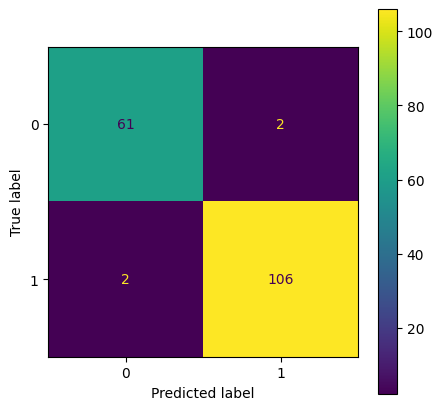

In [71]:
# Mostrar a Matriz de Confusão para os diversos patamares de renda familiar
fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_estimator(reg_log, X_test, y_test, ax=ax, values_format="d")

## Próximos passos

- Fazer normalização dos dados (Standard Scalar)
- Treinar outros modelos:
  - Árvore de decisão (Decision Tree Classifier)
  - Floresta aleatória (Random Forest Classifier)


In [72]:
# Árvore de decisão
# Importar o modelo Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9532163742690059

In [73]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_class = RandomForestClassifier(n_estimators=300, max_depth=6, random_state=100).fit(
    X_train, y_train
)
rf_class.score(X_test, y_test)

0.9707602339181286

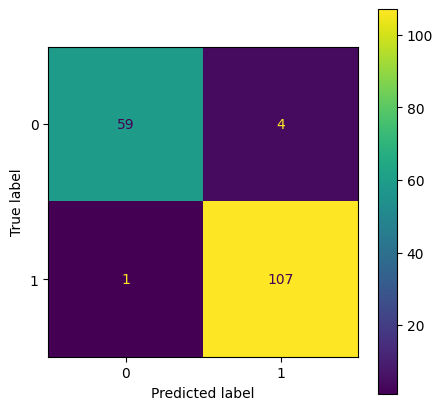

In [74]:
# Mostrar a Matriz de Confusão para os diversos patamares de renda familiar
fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_estimator(
    rf_class, X_test, y_test, ax=ax, values_format="d"
)

In [75]:
y_pred = rf_class.predict(X_test)
X_test[(y_test == 0) & (y_pred == 1)]

array([[1.380e+01, 1.579e+01, 9.043e+01, 5.841e+02, 1.007e-01, 1.280e-01,
        7.789e-02, 5.069e-02, 1.662e-01, 6.566e-02, 2.787e-01, 6.205e-01,
        1.957e+00, 2.335e+01, 4.717e-03, 2.065e-02, 1.759e-02, 9.206e-03,
        1.220e-02, 3.130e-03, 1.657e+01, 2.086e+01, 1.103e+02, 8.124e+02,
        1.411e-01, 3.542e-01, 2.779e-01, 1.383e-01, 2.589e-01, 1.030e-01],
       [1.396e+01, 1.705e+01, 9.143e+01, 6.024e+02, 1.096e-01, 1.279e-01,
        9.789e-02, 5.246e-02, 1.908e-01, 6.130e-02, 4.250e-01, 8.098e-01,
        2.563e+00, 3.574e+01, 6.351e-03, 2.679e-02, 3.119e-02, 1.342e-02,
        2.062e-02, 2.695e-03, 1.639e+01, 2.207e+01, 1.081e+02, 8.260e+02,
        1.512e-01, 3.262e-01, 3.209e-01, 1.374e-01, 3.068e-01, 7.957e-02],
       [1.448e+01, 2.146e+01, 9.425e+01, 6.482e+02, 9.444e-02, 9.947e-02,
        1.204e-01, 4.938e-02, 2.075e-01, 5.636e-02, 4.204e-01, 2.220e+00,
        3.301e+00, 3.887e+01, 9.369e-03, 2.983e-02, 5.371e-02, 1.761e-02,
        2.418e-02, 3.249e-03, 1.621e

In [76]:
y_pred[y_pred == 1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [77]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [78]:
y_pred == 1

array([ True, False, False,  True,  True, False, False, False, False,
        True,  True, False,  True, False,  True, False,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True, False, False,  True,  True, False, False,
        True,  True,  True, False, False,  True,  True, False, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
       False, False,  True, False, False,  True,  True,  True, False,
        True,  True, False,  True,  True, False,  True, False,  True,
        True,  True, False,  True,  True,  True, False,  True, False,
       False,  True,

## Balanceamento de classes


### **Undersampling da classe majoritária ( 'bening'('1') )**

Antes: ( bening('1')=357 , malignant('0')=212 )  
TOTAL = 569

Depois: ( bening('1')=212 , malignant('0')=212 )  
TOTAL = 424


In [79]:
# instalar as bibliotecas
#!pip install imblearn


# Importar bibliotecas
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [80]:
# Atribuir valores para X e y
X = df.iloc[:, :-1]
y = df.target

# Mostrar as dimensões de X e y
print("Dimensões de X = ", X.shape)
print("Dimensões de y = ", y.shape)

# Instanciar RandomUnderSampler
under = RandomUnderSampler(random_state=0)
# Treinar e fazer RandomUnderSampler nod dados
X_resampled, y_resampled = under.fit_resample(X, y)

# Mostrar as dimensões de X e y
print("Dimensões de X_resampled = ", X_resampled.shape)
print("Dimensões de y_resampled = ", y_resampled.shape)

Dimensões de X =  (569, 30)
Dimensões de y =  (569,)
Dimensões de X_resampled =  (424, 30)
Dimensões de y_resampled =  (424,)


In [81]:
# Criar datatframe a partir de X_resampled e y_resampled
df_undersampled = pd.DataFrame(X_resampled)
df_undersampled["target"] = y_resampled
df_undersampled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<Axes: title={'center': 'Total de amostras por tipo de cancer'}, xlabel='tipo cancer', ylabel='total de amostras'>

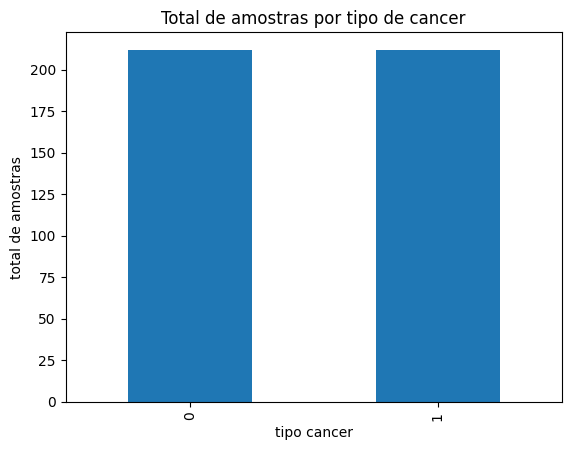

In [82]:
# Mostra gráfico a dirtibuição de amostras por rótulo da variável dependente("target")
df_undersampled.target.value_counts().plot(
    xlabel="tipo cancer",
    ylabel="total de amostras",
    kind="bar",
    title="Total de amostras por tipo de cancer",
)

In [83]:
# Atribuir valores para X e y
X = df_undersampled.iloc[:, :-1]
y = df_undersampled.target
# Dividir dados em treino e teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [84]:
# Regressão logística
# Instanciar modelo
reg_log = LogisticRegression(max_iter=3000)
# Treinar o modelo
reg_log.fit(X_train, y_train)
# Verificar a acurácia do modelo (.score)
reg_log.score(X_test, y_test)

0.953125

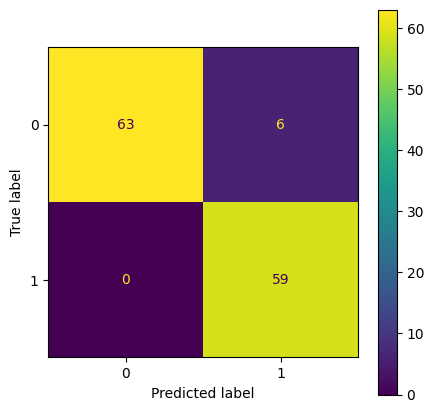

In [85]:
# Mostrar a Matriz de Confusão para os diversos patamares de renda familiar
fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_estimator(reg_log, X_test, y_test, ax=ax, values_format="d")

In [86]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Instanciar modelo
rf_class = RandomForestClassifier(n_estimators=300, max_depth=6, random_state=100)
# Treinar o modelo
rf_class.fit(X_train, y_train)
# Verificar a acurácia do modelo (.score)
rf_class.score(X_test, y_test)

0.9609375

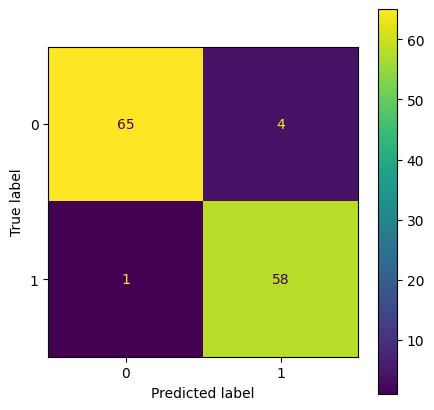

In [87]:
# Mostrar a Matriz de Confusão para os diversos patamares de renda familiar
fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_estimator(
    rf_class, X_test, y_test, ax=ax, values_format="d"
)

In [88]:
print("---- Undersampling majoritária ----")
print("Regressão logística=", reg_log.score(X_test, y_test))
print("Random Forest=", rf_class.score(X_test, y_test))

---- Undersampling majoritária ----
Regressão logística= 0.953125
Random Forest= 0.9609375


### **Oversampling da classe minoritária ( 'malignant'('0') )**

Antes: ( bening('1')=357 , malignant('0')=212 )  
TOTAL = 569

Depois: ( bening('1')=357 , malignant('0')=357 )  
TOTAL = 714


In [89]:
# Atribuir valores para X e y
X = df.iloc[:, :-1]
y = df.target

# Mostrar as dimensões de X e y
print("Dimensões de X = ", X.shape)
print("Dimensões de y = ", y.shape)
# Instanciar RandomOverSampler
over = RandomOverSampler(random_state=0)
# Treinar e fazer RandomOverSampler nod dados
X_resampled, y_resampled = over.fit_resample(X, y)

# Mostrar as dimensões de X e y
print("Dimensões de X_resampled = ", X_resampled.shape)
print("Dimensões de y_resampled = ", y_resampled.shape)

Dimensões de X =  (569, 30)
Dimensões de y =  (569,)
Dimensões de X_resampled =  (714, 30)
Dimensões de y_resampled =  (714,)


In [90]:
# Criar datatframe a partir de X_resampled e y_resampled
df_oversampled = pd.DataFrame(X_resampled)
df_oversampled["target"] = y_resampled
df_oversampled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<Axes: title={'center': 'Total de amostras por tipo de cancer'}, xlabel='tipo cancer', ylabel='total de amostras'>

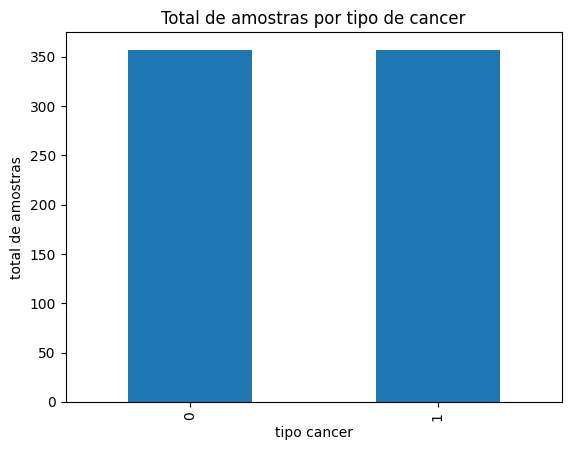

In [91]:
# Mostra gráfico a dirtibuição de amostras por rótulo da variável dependente("target")
df_oversampled.target.value_counts().plot(
    xlabel="tipo cancer",
    ylabel="total de amostras",
    kind="bar",
    title="Total de amostras por tipo de cancer",
)

In [92]:
# Atribuir valores para X e y
X = df_oversampled.iloc[:, :-1]
y = df_oversampled.target
# Dividir dados em treino e teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [93]:
# Instanciar modelo de regressão logística
reg_log = LogisticRegression(max_iter=3000)

# Treinar o modelo
reg_log.fit(X_train, y_train)

# Verificar a acurácia do modelo (.score)
reg_log.score(X_test, y_test)

0.9674418604651163

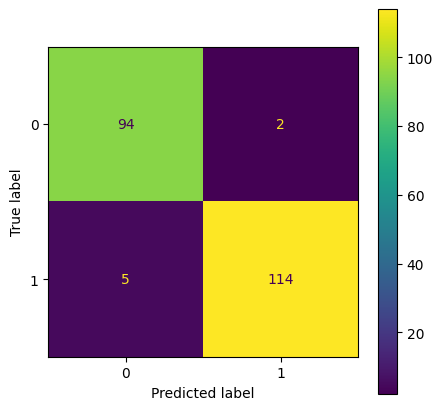

In [94]:
# Mostrar a Matriz de Confusão para os diversos patamares de renda familiar
fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_estimator(reg_log, X_test, y_test, ax=ax, values_format="d")

In [95]:
# Random Forest
# Treinar o modelo
rf_class = RandomForestClassifier(n_estimators=300, max_depth=6, random_state=0).fit(
    X_train, y_train
)

# Verificar a acurácia do modelo (.score)
rf_class.score(X_test, y_test)

0.9813953488372092

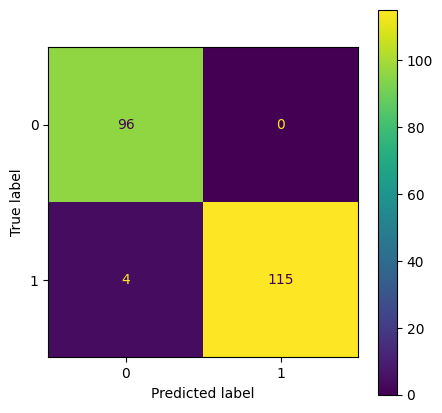

In [96]:
# Mostrar a Matriz de Confusão para os diversos patamares de renda familiar
fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_estimator(
    rf_class, X_test, y_test, ax=ax, values_format="d"
)

In [97]:
print("---- Oversampling minoritária ----")
print("Regressão logística=", reg_log.score(X_test, y_test))
print("Random Forest=", rf_class.score(X_test, y_test))

---- Oversampling minoritária ----
Regressão logística= 0.9674418604651163
Random Forest= 0.9813953488372092


### **Oversampling minoritária e Undersampling da majoritária**

Antes: ( bening('1')=357 , malignant('0')=212 )  
TOTAL = 569

Depois: ( bening('1')=284 , malignant('0')=284 )  
TOTAL = 570


In [98]:
# Atribuir valores para X e y
X = df.iloc[:, :-1]
y = df.target
y.value_counts()

target
1    357
0    212
Name: count, dtype: int64

#### OverSamplig minoritária


In [99]:
# Mostrar distribuição da variável target por classe
print(Counter(y))
# define estratégia oversampling
over = RandomOverSampler(
    random_state=0, sampling_strategy=0.8
)  # aumenta minoritária = 80% da majoritária.
# treina e aplica a transformação
X_resampled, y_resampled = over.fit_resample(X, y)
# Mostrar distribuição da variável target por classe
print(Counter(y_resampled))

Counter({1: 357, 0: 212})
Counter({1: 357, 0: 285})


#### UnderSamplig majoritária


In [100]:
# Mostrar distribuição da variável target por classe
print(Counter(y_resampled))
# define estratégia undersampling
under = RandomUnderSampler(random_state=0)  # diminui majoritária = minoritária.
# treina e aplica a transformação
X_resampled, y_resampled = under.fit_resample(X_resampled, y_resampled)
# Mostrar distribuição da variável target por classe
print(Counter(y_resampled))

Counter({1: 357, 0: 285})
Counter({0: 285, 1: 285})


In [101]:
# Atribuir valores para X e y
X = X_resampled
y = y_resampled
# Dividir dados em treino e teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [102]:
# Instanciar modelo de regressão logística
reg_log = LogisticRegression(max_iter=3000)

# Treinar o modelo
reg_log.fit(X_train, y_train)

# Verificar a acurácia do modelo (.score)
reg_log.score(X_test, y_test)

0.9415204678362573

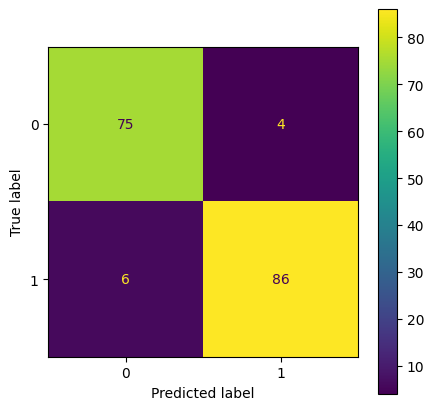

In [103]:
# Mostrar a Matriz de Confusão para os diversos patamares de renda familiar
fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_estimator(reg_log, X_test, y_test, ax=ax, values_format="d")

In [104]:
# Random Forest
# Treinar o modelo
rf_class = RandomForestClassifier(n_estimators=300, max_depth=6, random_state=0).fit(
    X_train, y_train
)

# Verificar a acurácia do modelo (.score)
rf_class.score(X_test, y_test)

0.9590643274853801

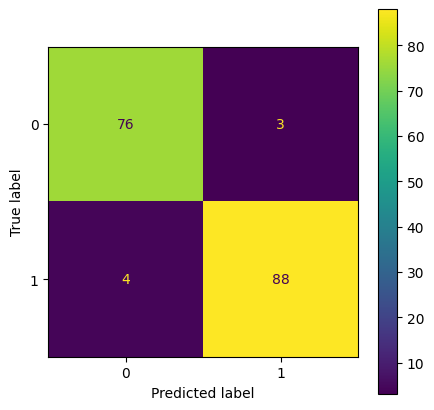

In [105]:
# Mostrar a Matriz de Confusão para os diversos patamares de renda familiar
fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_estimator(
    rf_class, X_test, y_test, ax=ax, values_format="d"
)

In [106]:
print("---- Undersampling majoritária + Oversampling minoritária ----")
print("Regressão logística=", reg_log.score(X_test, y_test))
print("Random Forest=", rf_class.score(X_test, y_test))

---- Undersampling majoritária + Oversampling minoritária ----
Regressão logística= 0.9415204678362573
Random Forest= 0.9590643274853801


### **SMOTE - Oversampling da classe minoritária ( 'malignant'('0') )**

Antes: ( bening('1')=357 , malignant('0')=212 )  
TOTAL = 569

Depois: ( bening('1')=357 , malignant('0')=357 )  
TOTAL = 714


In [107]:
from imblearn.over_sampling import SMOTE

# Atribuir valores para X e y
X = df.iloc[:, :-1]
y = df.target

# Mostrar as dimensões de X e y
print("Dimensões de X = ", X.shape)
print("Dimensões de y = ", y.shape)
# Instanciar SMOTE
smote = SMOTE(random_state=42)
# Treinar e fazer SMOTE nos dados
X_smote, y_smote = smote.fit_resample(X, y)

# Mostrar as dimensões de X e y
print("Dimensões de X_smote = ", X_smote.shape)
print("Dimensões de y_smote = ", y_smote.shape)

Dimensões de X =  (569, 30)
Dimensões de y =  (569,)
Dimensões de X_smote =  (714, 30)
Dimensões de y_smote =  (714,)


In [108]:
# Instanciar RandomUnderSampler
# Treinar e fazer RandomUnderSampler nod dados
# Criar datatframe a partir de X_resampled e y_resampled

In [109]:
# Criar datatframe a partir de X_smote e y_smote
df_smote = pd.DataFrame(X_smote)
df_smote["target"] = y_smote
df_smote.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<Axes: title={'center': 'Total de amostras por tipo de cancer'}, xlabel='tipo cancer', ylabel='total de amostras'>

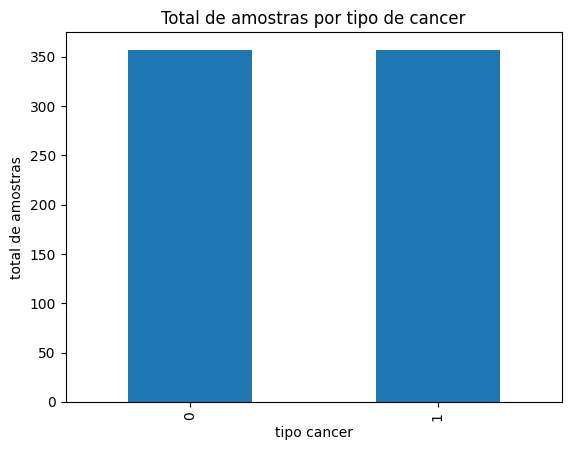

In [110]:
# Mostra gráfico a dirtibuição de amostras por rótulo da variável dependente("target")
df_smote.target.value_counts().plot(
    xlabel="tipo cancer",
    ylabel="total de amostras",
    kind="bar",
    title="Total de amostras por tipo de cancer",
)

In [111]:
# Atribuir valores para X e y
X = df_smote.iloc[:, :-1]
y = df_smote.target
# Dividir dados em treino e teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [112]:
# Instanciar modelo de regressão logística
reg_log = LogisticRegression(max_iter=3000)

# Treinar o modelo
reg_log.fit(X_train, y_train)

# Verificar a acurácia do modelo (.score)
reg_log.score(X_test, y_test)

0.9674418604651163

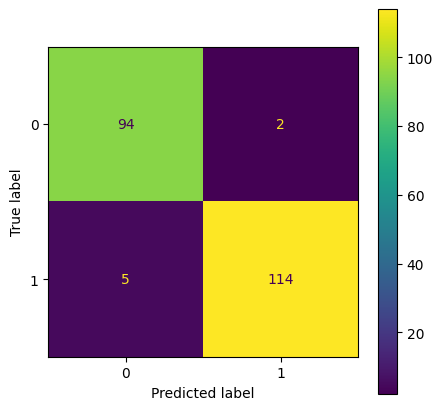

In [113]:
# Mostrar a Matriz de Confusão para os diversos patamares de renda familiar
fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_estimator(reg_log, X_test, y_test, ax=ax, values_format="d")

In [114]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Treinar o modelo
rf_class = RandomForestClassifier(n_estimators=300, max_depth=6, random_state=0).fit(
    X_train, y_train
)

# Verificar a acurácia do modelo (.score)
rf_class.score(X_test, y_test)

0.9674418604651163

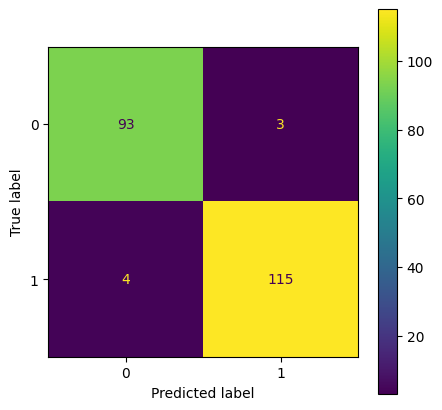

In [115]:
# Mostrar a Matriz de Confusão para os diversos patamares de renda familiar
fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_estimator(
    rf_class, X_test, y_test, ax=ax, values_format="d"
)

In [116]:
print("---- SMOTE ----")
print("Regressão logística=", reg_log.score(X_test, y_test))
print("Random Forest=", rf_class.score(X_test, y_test))

---- SMOTE ----
Regressão logística= 0.9674418604651163
Random Forest= 0.9674418604651163


## Conclusão

---- Undersampling majoritária ----  
Regressão logística= 0.9674418604651163  
Random Forest= 0.9813953488372092

---- Undersampling majoritária + Oversampling minoritária ----  
Regressão logística= 0.9415204678362573  
Random Forest= 0.9590643274853801

---- SMOTE ----  
Regressão logística= 0.9627906976744186  
Random Forest= 0.9674418604651163

O melhor balanceamento:

- Oversampling da classe minoritária ( 'malignant'('0') )


#### **Observação:**

Por uma questão didática, eu apliquei o balanceamento no dataset completo, mas sugiro aplicar o balanceamento apenas nos dados de treinamento, sem modificar o dataset original.


#FIM
